# Gradient Boosting


## Tasks

### Task 1

Import data you need to solve tasks for this lesson. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 5)

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('vehicle_insurance.csv')

In [3]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
data.shape

(10000, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                10000 non-null  object 
 1   Age                   10000 non-null  int64  
 2   Driving_License       10000 non-null  int64  
 3   Region_Code           10000 non-null  float64
 4   Previously_Insured    10000 non-null  int64  
 5   Vehicle_Age           10000 non-null  object 
 6   Vehicle_Damage        10000 non-null  object 
 7   Annual_Premium        10000 non-null  float64
 8   Policy_Sales_Channel  10000 non-null  float64
 9   Vintage               10000 non-null  int64  
 10  Response              10000 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 859.5+ KB


### Task 2

Perform basic EDA on your data. 

In [6]:
data.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.812900,0.997800,26.425400,0.443800,30609.649700,112.414400,155.560300,0.124700
std,15.514785,0.046855,13.153552,0.496856,16562.392967,53.975042,83.923849,0.330395
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24458.250000,30.000000,83.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31746.000000,136.000000,156.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39572.250000,152.000000,228.000000,0.000000
max,84.000000,1.000000,52.000000,1.000000,267698.000000,163.000000,299.000000,1.000000


In [7]:
data.corr()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Age,1.000000,-0.081323,0.030638,-0.261456,0.081564,-0.576066,0.000030,0.113888
Driving_License,-0.081323,1.000000,0.004926,0.020464,-0.014338,0.044335,0.002704,0.011263
Region_Code,0.030638,0.004926,1.000000,-0.021270,-0.012213,-0.039733,-0.008527,0.010230
Previously_Insured,-0.261456,0.020464,-0.021270,1.000000,-0.005164,0.224719,0.022350,-0.333502
Annual_Premium,0.081564,-0.014338,-0.012213,-0.005164,1.000000,-0.123851,-0.008878,0.029839
Policy_Sales_Channel,-0.576066,0.044335,-0.039733,0.224719,-0.123851,1.000000,-0.006131,-0.146421
Vintage,0.000030,0.002704,-0.008527,0.022350,-0.008878,-0.006131,1.000000,-0.007187
Response,0.113888,0.011263,0.010230,-0.333502,0.029839,-0.146421,-0.007187,1.000000


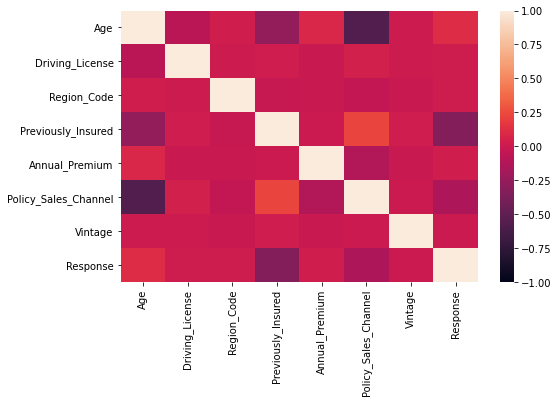

In [8]:
sns.heatmap(data.corr(), vmin=-1, vmax=1);

Let's check is our target balanced?

In [9]:
data.Response.value_counts()

0    8753
1    1247
Name: Response, dtype: int64

### Task 3 

Perform OneHotEncoding for categorical `object` columns. 

In [10]:
cat_cols = data.select_dtypes(include='object').columns

In [11]:
cat_cols

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [12]:
for col in cat_cols:
    ohe = pd.get_dummies(data[col], drop_first=True, prefix=col)
    data = pd.concat([data, ohe], axis=1)
    data.drop(col, axis=1, inplace=True)

In [13]:
data.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    10000 non-null  int64  
 1   Driving_License        10000 non-null  int64  
 2   Region_Code            10000 non-null  float64
 3   Previously_Insured     10000 non-null  int64  
 4   Annual_Premium         10000 non-null  float64
 5   Policy_Sales_Channel   10000 non-null  float64
 6   Vintage                10000 non-null  int64  
 7   Response               10000 non-null  int64  
 8   Gender_Male            10000 non-null  uint8  
 9   Vehicle_Age_< 1 Year   10000 non-null  uint8  
 10  Vehicle_Age_> 2 Years  10000 non-null  uint8  
 11  Vehicle_Damage_Yes     10000 non-null  uint8  
dtypes: float64(3), int64(5), uint8(4)
memory usage: 664.2 KB


In [15]:
data.shape

(10000, 12)

### Task 4

Split data on train and test samples. 

In [16]:
X = data.drop('Response', axis=1)
y = data['Response']

In [17]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True, test_size=0.2)

### Task 5

Fit a gradient boosting classification model. 

In [18]:
from sklearn.ensemble import GradientBoostingClassifier


gb = GradientBoostingClassifier(learning_rate = 1, random_state = 1, n_estimators = 100)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, random_state=1)

### Task 6

Show a ROC-AUC curve for a gradient boosting classifier model. 

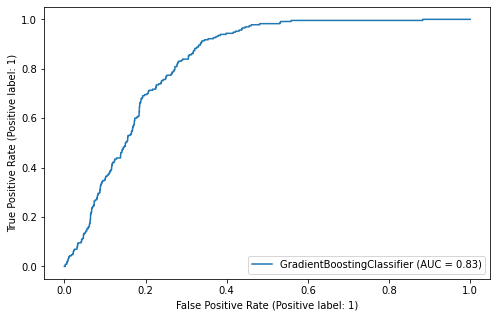

In [19]:
from sklearn.metrics import RocCurveDisplay


RocCurveDisplay.from_estimator(gb, X_test, y_test)
plt.show();

In [20]:
from sklearn.metrics import roc_curve, auc


fpr, tpr, t = roc_curve(y_test, gb.predict_proba(X_test)[:, 1])

In [21]:
print(f'AUC = {auc(fpr, tpr):.3f}')

AUC = 0.828


### Task 7

Explore different `n_estimators` and `learning_rate` parameters.

In [22]:
from sklearn.metrics import f1_score


n_estimators_list = [5, 10, 20, 50, 100, 200, 700, 1000]
learning_rate_list = [1, 0.1, 0.01]

scores = dict()
for (i, n) in enumerate(n_estimators_list):
    for (j, lr) in enumerate(learning_rate_list):
        model = GradientBoostingClassifier(n_estimators=n,
                                           learning_rate=lr,
                                           max_depth=5,
                                           random_state=1)
        model.fit(X_train, y_train)
        scores[(n, lr)] = f1_score(y_test, model.predict(X_test), average='weighted')

In [23]:
scores

{(5, 1): 0.8359832466969576,
 (5, 0.1): 0.8319706786734022,
 (5, 0.01): 0.8310079575596817,
 (10, 1): 0.8384003359824256,
 (10, 0.1): 0.8319706786734022,
 (10, 0.01): 0.8310079575596817,
 (20, 1): 0.8441822850241137,
 (20, 0.1): 0.8317171483552103,
 (20, 0.01): 0.8310079575596817,
 (50, 1): 0.8360328757022755,
 (50, 0.1): 0.8316268930523463,
 (50, 0.01): 0.8322241135533787,
 (100, 1): 0.8374898105725385,
 (100, 0.1): 0.8377279171194056,
 (100, 0.01): 0.8319706786734022,
 (200, 1): 0.8426079956106953,
 (200, 0.1): 0.8431243243243244,
 (200, 0.01): 0.8317171483552103,
 (700, 1): 0.8440186407963912,
 (700, 0.1): 0.8426801637908706,
 (700, 0.01): 0.8348982048283926,
 (1000, 1): 0.8464474778638382,
 (1000, 0.1): 0.8460634986511725,
 (1000, 0.01): 0.8371109714914002}

In [24]:
f1_max = 0
best_params = ''

for k, v in scores.items():
    if v > f1_max:
        f1_max = v
        best_params = k

In [25]:
print(f'Best n_estimators={best_params[0]} and best learning_rate={best_params[1]} give F-1 score={f1_max:.3f}')

Best n_estimators=1000 and best learning_rate=1 give F-1 score=0.846


### Task 8

Visualize the results. 

In [26]:
# Create lists for index (first tuple value) and columns (second tuple value)
index_vals = sorted(list(set([k[0] for k in scores.keys()])))
col_vals = sorted(list(set([k[1] for k in scores.keys()])))

# Create an empty DataFrame with the correct index and columns
df = pd.DataFrame(index=index_vals, columns=col_vals)

# Fill the DataFrame with values from the dictionary
for (idx, col), value in scores.items():
    df.loc[idx, col] = value

# Optional: Round the values to make them more readable
df = df.round(4)

In [27]:
df

,0.01,0.10,1.00
5,0.831008,0.831971,0.835983
10,0.831008,0.831971,0.8384
20,0.831008,0.831717,0.844182
50,0.832224,0.831627,0.836033
100,0.831971,0.837728,0.83749
200,0.831717,0.843124,0.842608
700,0.834898,0.84268,0.844019
1000,0.837111,0.846063,0.846447


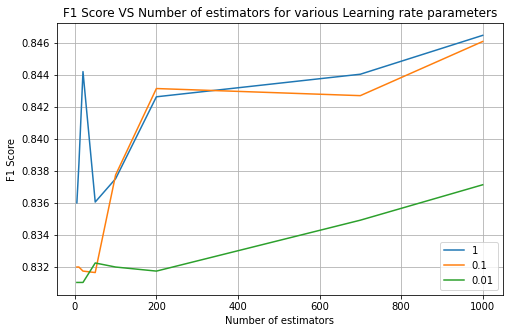

In [28]:
plt.plot(df[[1]])
plt.plot(df[[0.1]])
plt.plot(df[[0.01]])

plt.title('F1 Score VS Number of estimators for various Learning rate parameters')
plt.xlabel('Number of estimators')
plt.ylabel('F1 Score')

plt.grid()
plt.legend(learning_rate_list);

### Task 9

Find the best model (f1-score) and the best `n_estimators` pararmeter among:
- Random forest max_depth=5
- Random forets max_depth=5000
- Gradient boosting max_depth=5
- Gradient boosting max_depth=5000

In [29]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


n_estimators_list = [2, 3, 4, 5, 10, 20, 50, 70, 100, 200, 700, 1000, 2000]

rf_5 = []
rf_5k = []
gb_5 = []
gb_5k = []

for n in n_estimators_list:
    model_rf_5 = RandomForestClassifier(n_estimators=n, max_depth=5)
    model_rf_5k = RandomForestClassifier(n_estimators=n, max_depth=5000)
    model_gb_5 = GradientBoostingClassifier(n_estimators=n, max_depth=5)
    model_gb_5k = GradientBoostingClassifier(n_estimators=n, max_depth=5000)
    
    model_rf_5.fit(X_train, y_train)
    model_rf_5k.fit(X_train, y_train)
    model_gb_5.fit(X_train, y_train)
    model_gb_5k.fit(X_train, y_train)
    
    rf_5.append(f1_score(y_test, model_rf_5.predict(X_test), average='weighted'))
    rf_5k.append(f1_score(y_test, model_rf_5k.predict(X_test), average='weighted'))
    gb_5.append(f1_score(y_test, model_gb_5.predict(X_test), average='weighted'))
    gb_5k.append(f1_score(y_test, model_gb_5k.predict(X_test), average='weighted'))

### Task 10

Visualize the results. 

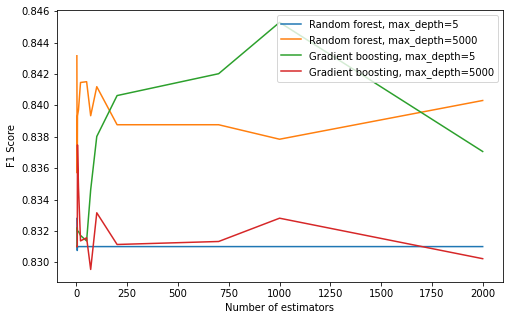

In [30]:
plt.plot(n_estimators_list, rf_5)
plt.plot(n_estimators_list, rf_5k)
plt.plot(n_estimators_list, gb_5)
plt.plot(n_estimators_list, gb_5k)

plt.xlabel('Number of estimators')
plt.ylabel('F1 Score')
plt.legend(['Random forest, max_depth=5', 'Random forest, max_depth=5000', 'Gradient boosting, max_depth=5', 'Gradient boosting, max_depth=5000'],
           loc='upper right')

plt.show();

### Task 11

Use `catboost` library to fit a new gradient boosting model. 

In [31]:
data_cb = pd.read_csv('vehicle_insurance.csv')

In [32]:
data_cb.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [33]:
data_cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                10000 non-null  object 
 1   Age                   10000 non-null  int64  
 2   Driving_License       10000 non-null  int64  
 3   Region_Code           10000 non-null  float64
 4   Previously_Insured    10000 non-null  int64  
 5   Vehicle_Age           10000 non-null  object 
 6   Vehicle_Damage        10000 non-null  object 
 7   Annual_Premium        10000 non-null  float64
 8   Policy_Sales_Channel  10000 non-null  float64
 9   Vintage               10000 non-null  int64  
 10  Response              10000 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 859.5+ KB


In [34]:
cat_cols = data_cb.select_dtypes(include='object').columns.tolist()

In [35]:
cat_cols

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [36]:
X_cb = data_cb.drop('Response', axis=1)
y_cb = data_cb['Response']

In [37]:
X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(X_cb, y_cb, random_state=0, shuffle=True, test_size=0.2)

In [38]:
from catboost import CatBoostClassifier


catboost_model = CatBoostClassifier()
catboost_model.fit(X_train_cb, y_train_cb, cat_features=cat_cols, verbose=False)

### Task 12

Explore the results including features importance. 

In [39]:
from sklearn.metrics import classification_report


print(classification_report(y_test_cb, catboost_model.predict(X_test_cb), digits=3))

              precision    recall  f1-score   support

           0      0.889     0.987     0.935      1770
           1      0.343     0.052     0.091       230

    accuracy                          0.879      2000
   macro avg      0.616     0.520     0.513      2000
weighted avg      0.826     0.879     0.838      2000



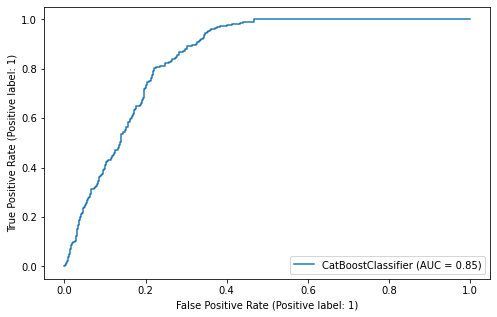

In [40]:
RocCurveDisplay.from_estimator(catboost_model, X_test_cb, y_test_cb);

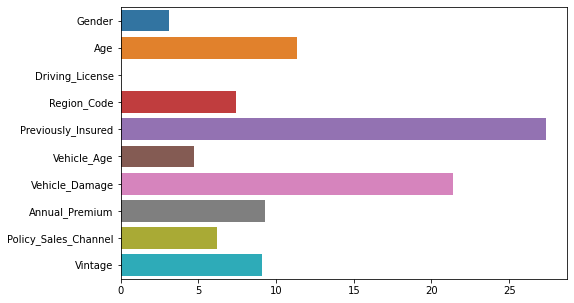

In [41]:
sns.barplot(x=catboost_model.feature_importances_, y=X_cb.columns);

### Task 13

Use a `lightGBM` library to fit a model by finding the best parameters using `GridSearchCV`.

In [42]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV


params = {'n_estimators': [100, 500, 1000, 2000],
          'max_depth': [2, 3, 5, 100],
          'learning_rate': [0.1, 0.01, 0.001]}

light_gbm = LGBMClassifier()
search = GridSearchCV(light_gbm, params)

search.fit(X_train, y_train)

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 3, 5, 100],
                         'n_estimators': [100, 500, 1000, 2000]})

In [43]:
search.best_params_

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}

### Task 14

Explore the results including features importance.

In [44]:
light_gbm = LGBMClassifier(learning_rate=0.01, max_depth=2, n_estimators=100)
light_gbm.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.01, max_depth=2)

In [45]:
print(classification_report(y_test, light_gbm.predict(X_test), digits=3))

              precision    recall  f1-score   support

           0      0.885     1.000     0.939      1770
           1      0.000     0.000     0.000       230

    accuracy                          0.885      2000
   macro avg      0.443     0.500     0.469      2000
weighted avg      0.783     0.885     0.831      2000



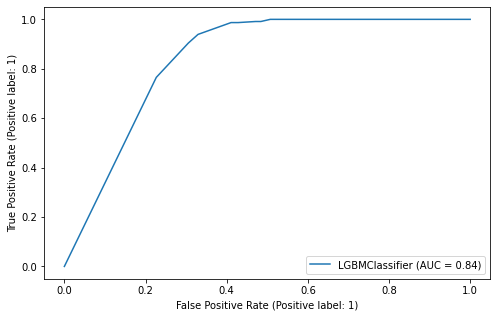

In [46]:
RocCurveDisplay.from_estimator(light_gbm, X_test, y_test);

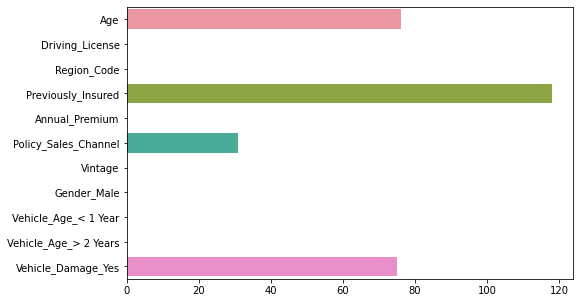

In [47]:
sns.barplot(x=light_gbm.feature_importances_, y=X.columns);